In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
import numpy as np
import warnings

warnings.filterwarnings('ignore')

PATH_CENSUS = 'https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/census/'

In [2]:
def abs_to_perc(df_given):
    temp = df_given.copy()
    cols = list(temp.columns)
    temp['total'] = temp.sum(axis=1)
    for c in cols: temp[c] = temp[c]/temp['total']*100
    temp.drop(['total'],axis=1,inplace=True)
    return temp

df = pd.read_csv(PATH_CENSUS + 'census_parlimen.csv')

# We need to trim down the number of columns to keep the corrmap parsimonious
# Selecting columns is a mixture of sensibility and art
# Sensibility --> Keeping only one variable from a set (e.g. female/male only, one age group only, etc)
# Art --> Keeping manufacturing, services, and agriculture rather than all sectoral groups
col_selected = [
    'area_km2', 'population_total', 'household_size_avg',
    'nationality_citizen', 
    'sex_female', 
    'ethnicity_proportion_bumi',
    'ethnicity_proportion_chinese',
    'age_proportion_15_64',
    'live_births','deaths',
    'labour_participation_rate','labour_unemployment_rate',
    'income_median','expenditure_avg', 'gini', 'poverty_incidence',
    'sme_small','sme_micro', 'sme_medium', 
    'businesses_agriculture','businesses_manufacturing', 'businesses_services',
    'utilities_pipedwater_home','utilities_electricity_home'
]

# These names are just to make the chart easier to inspect; ymmv (your mileage may vary)
col_shortname = ['area','pop','house_size',
                 'citizen','female','bumiputera','chinese','working_age',
                 'births','deaths',
                 'participation','unemployment','income','expenditure','inequality','poverty',
                 'sme_small','sme_micro', 'sme_medium',
                 'agri','mfg','services',
                 'water','electricity']

for group in [['sex_male','sex_female'],['nationality_citizen', 'nationality_non_citizen']]: df[group] = abs_to_perc(df[group])
df = df[col_selected]
df.columns = col_shortname

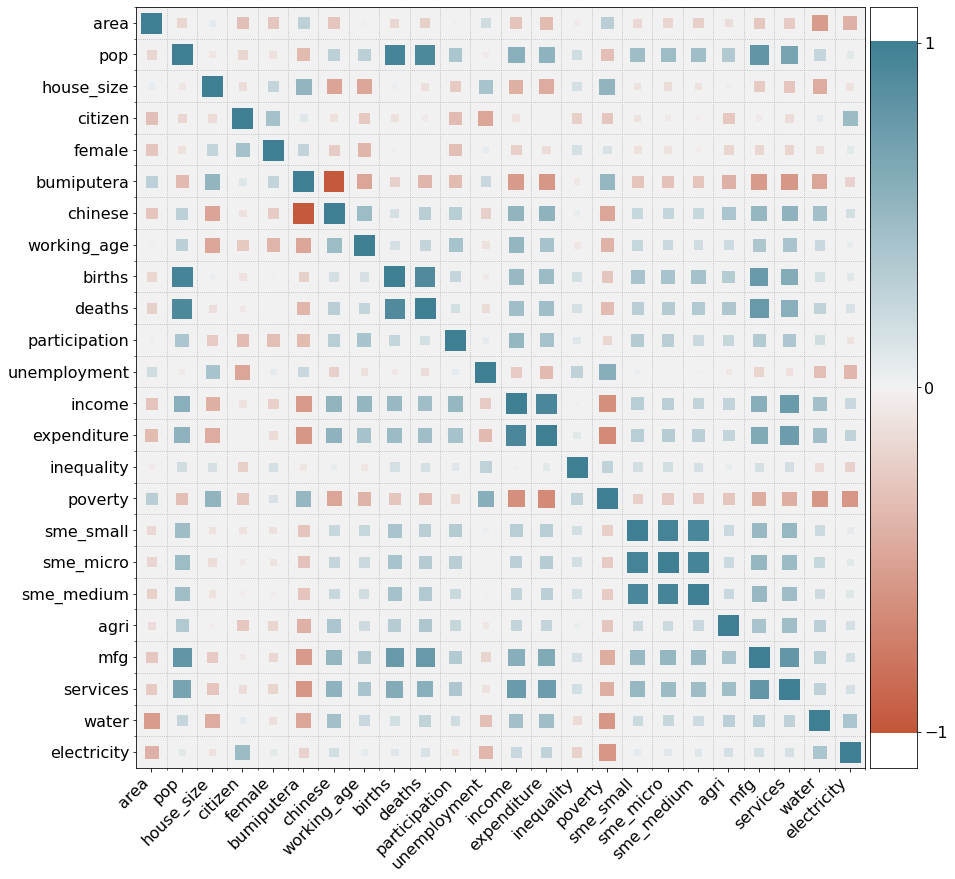

In [3]:
plt.rcParams.update({'font.size': 16,
                     'font.family':'sans-serif',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [14,14],
                     'figure.autolayout': True,
                     'figure.facecolor':'#fff'})

corrplot(df.corr(),size_scale=400)